In [33]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import warnings

from matplotlib import pylab as plt

from IPython.core.interactiveshell import InteractiveShell

from statsmodels.graphics.gofplots import qqplot


In [34]:
df = pd.read_csv("all_data.csv")

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [36]:
categorical = df.columns
for col in categorical:
    print("{} : {} unique values".format(col, df[col].nunique()))

Order ID : 178438 unique values
Product : 20 unique values
Quantity Ordered : 10 unique values
Price Each : 18 unique values
Order Date : 142396 unique values
Purchase Address : 140788 unique values


In [37]:
missing_value_count = df.isnull().sum()

missing_value_count

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [38]:
total_cells = np.product(df.shape)
total_missing = missing_value_count.sum()

percentage = (total_missing/total_cells) * 100
print("Missing Percentage: {}%".format(round(percentage, 2)))

Missing Percentage: 0.29%


In [39]:
# Data cleaning

sales_data = df.dropna(how='all')

sales_data[sales_data.isna().any(axis=1)]

sales_data = sales_data[sales_data['Order Date'].str[0:2] != 'Or']
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700,08/06/2019 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/2019 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/2019 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/2019 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/2019 10:39,"778 River St, Dallas, TX 75001"


In [40]:
sales_data['Quantity Ordered'], sales_data['Price Each'] = sales_data['Quantity Ordered'].astype('int64'), sales_data['Price Each'].astype('float')

sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


In [41]:
# convert order date into date time

sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"


In [42]:
# Save clean data to a new csv file
sales_data.to_csv('clean_data.csv', index=False)


In [43]:
# Add month, hour, miunte, sales, cities column

def augmented_data(data):
    def get_city(address):
        return address.split(',')[1]
    
    def get_state(address):
        return address.split(',')[2].split(' ')[1]
    
    data['Year'] = data['Order Date'].dt.year
    data['Month'] = data['Order Date'].dt.month
    data['Hour'] = data['Order Date'].dt.hour
    data['Minute'] = data['Order Date'].dt.minute
    
    data['Sales'] = data['Quantity Ordered'] * data['Price Each']
    
    data['Cities'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")


    return data

sales_data = augmented_data(sales_data)
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Sales,Cities
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",2019,8,22,21,23.98,Seattle (WA)
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",2019,8,15,11,99.99,Dallas (TX)
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",2019,8,14,40,700.00,Portland (OR)
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",2019,8,20,59,7.68,Los Angeles (CA)
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",2019,8,19,53,7.68,New York City (NY)


C:\Users\kaikai\AppData\Local\Temp\ipykernel_11824\3354745296.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sales_data.corr(), annot=True)


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'Quantity Ordered'),
  Text(0, 1.5, 'Price Each'),
  Text(0, 2.5, 'Year'),
  Text(0, 3.5, 'Month'),
  Text(0, 4.5, 'Hour'),
  Text(0, 5.5, 'Minute'),
  Text(0, 6.5, 'Sales')])

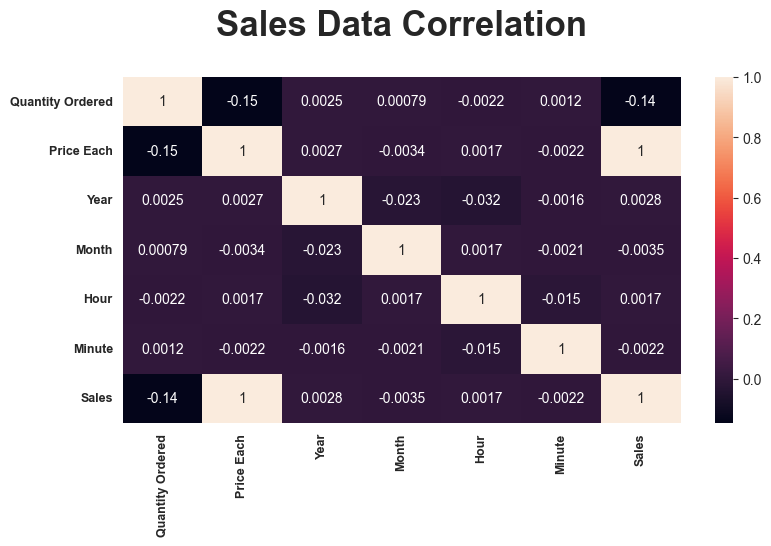

In [44]:
# Data Analysis

sns.set_style("whitegrid")
plt.figure(figsize=(9,4.5))
sns.heatmap(sales_data.corr(), annot=True)
plt.title("Sales Data Correlation", weight="bold", fontsize=25, pad=30)
plt.xticks(weight="bold", fontsize=9)
plt.yticks(weight="bold", fontsize=9)


In [45]:
sales_data.corr()['Sales'].sort_values(ascending=False).to_frame().T

C:\Users\kaikai\AppData\Local\Temp\ipykernel_11824\2589794331.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sales_data.corr()['Sales'].sort_values(ascending=False).to_frame().T


,Sales,Price Each,Year,Hour,Minute,Month,Quantity Ordered
Sales,1.0,0.999203,0.002824,0.001668,-0.002162,-0.003466,-0.139417


In [46]:
sales_data_numeric = sales_data.describe(include=[np.number])

sales_data_numeric

,Quantity Ordered,Price Each,Year,Month,Hour,Minute,Sales
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,2019.000183,7.059140,14.413305,29.481361,185.490917
std,0.442793,332.731330,0.013521,3.502996,5.423416,17.317573,332.919771
min,1.000000,2.990000,2019.000000,1.000000,0.000000,0.000000,2.990000
25%,1.000000,11.950000,2019.000000,4.000000,11.000000,14.000000,11.950000
50%,1.000000,14.950000,2019.000000,7.000000,15.000000,29.000000,14.950000
75%,1.000000,150.000000,2019.000000,10.000000,19.000000,45.000000,150.000000
max,9.000000,1700.000000,2020.000000,12.000000,23.000000,59.000000,3400.000000


In [47]:
sales_data_object = sales_data.describe(exclude=[np.number])

sales_data_object

C:\Users\kaikai\AppData\Local\Temp\ipykernel_11824\354652304.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  sales_data_object = sales_data.describe(exclude=[np.number])


,Order ID,Product,Order Date,Purchase Address,Cities
count,185950,185950,185950,185950,185950
unique,178437,19,142395,140787,10
top,160873,USB-C Charging Cable,2019-12-15 20:16:00,"193 Forest St, San Francisco, CA 94016",San Francisco (CA)
freq,5,21903,8,9,44732
first,NaN,NaN,2019-01-01 03:07:00,NaN,NaN
last,NaN,NaN,2020-01-01 05:13:00,NaN,NaN


In [48]:
def univariate_analysis(data, color, title1, title2):
    """
    Showing visualization of univariate
    analysis with displot and qqplot
    visualization from seaborn and statsmodel
    library.
    
    Parameters
    ----------
    data : DataFrame, array, or list of arrays, optional
        Dataset for plotting. If ``x`` and ``y`` are absent, this is
        interpreted as wide-form. Otherwise it is expected to be long-form. 
    title1: The title of the visualization, title1 for displot visualization
        And title2 for quantile plot from statsmodel.
    title2: The title of the visualization, title1 for displot visualization
        And title2 for quantile plot from statsmodel.
        
    Returns
    -------
    fig : matplotlib figure
        Returns the Figure object with the plot drawn onto it.
    """

    fig, (ax1, ax2) = plt.subplots(  # subplots
        ncols=2,  # num of cols
        nrows=1,  # num of rows
        figsize=(20, 6)  # set the width and high
    )

    sns.distplot(  # create a distplot visualization
        data,  # data
        ax=ax1,  # axes 1
        kde=True,  # kde
        color=color  # color
    )

    ax1.set_title(  # set the title 1
        title1,
        weight="bold",  # weight
        fontsize=25,  # font-size
        pad=30  # padding
    )

    qqplot(  # qqplot (quantile plot)
        data,  # data
        ax=ax2,  # axes 2
        line='s'  # line
    )

    ax2.set_title(  # set the title 2
        title2,
        weight="bold",  # weight
        fontsize=25,  # font-size
        pad=30  # padding
    )

    return fig  # returning the figure


C:\Users\kaikai\AppData\Local\Temp\ipykernel_11824\823558206.py:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(  # create a distplot visualization


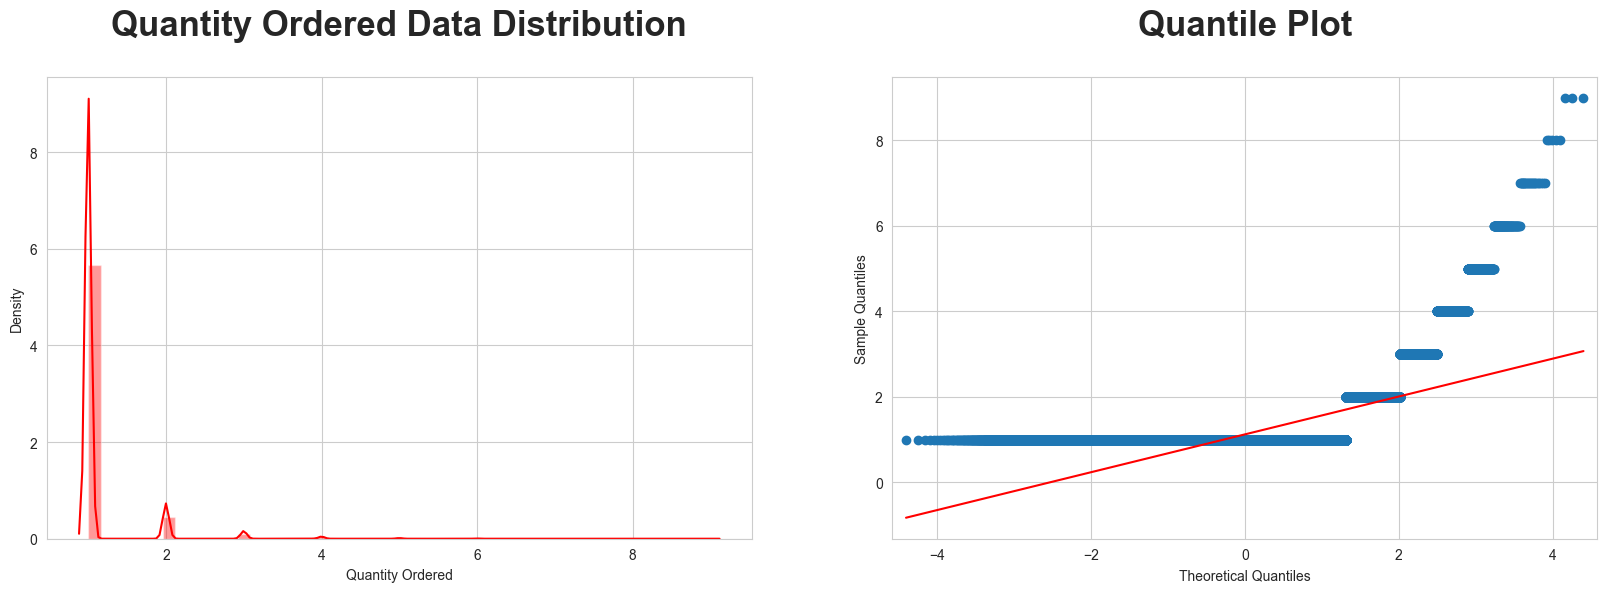

In [49]:
univariate_analysis(
    data=sales_data['Quantity Ordered'],
    color='red',
    title1='Quantity Ordered Data Distribution',
    title2='Quantile Plot'  
);

C:\Users\kaikai\AppData\Local\Temp\ipykernel_11824\823558206.py:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(  # create a distplot visualization


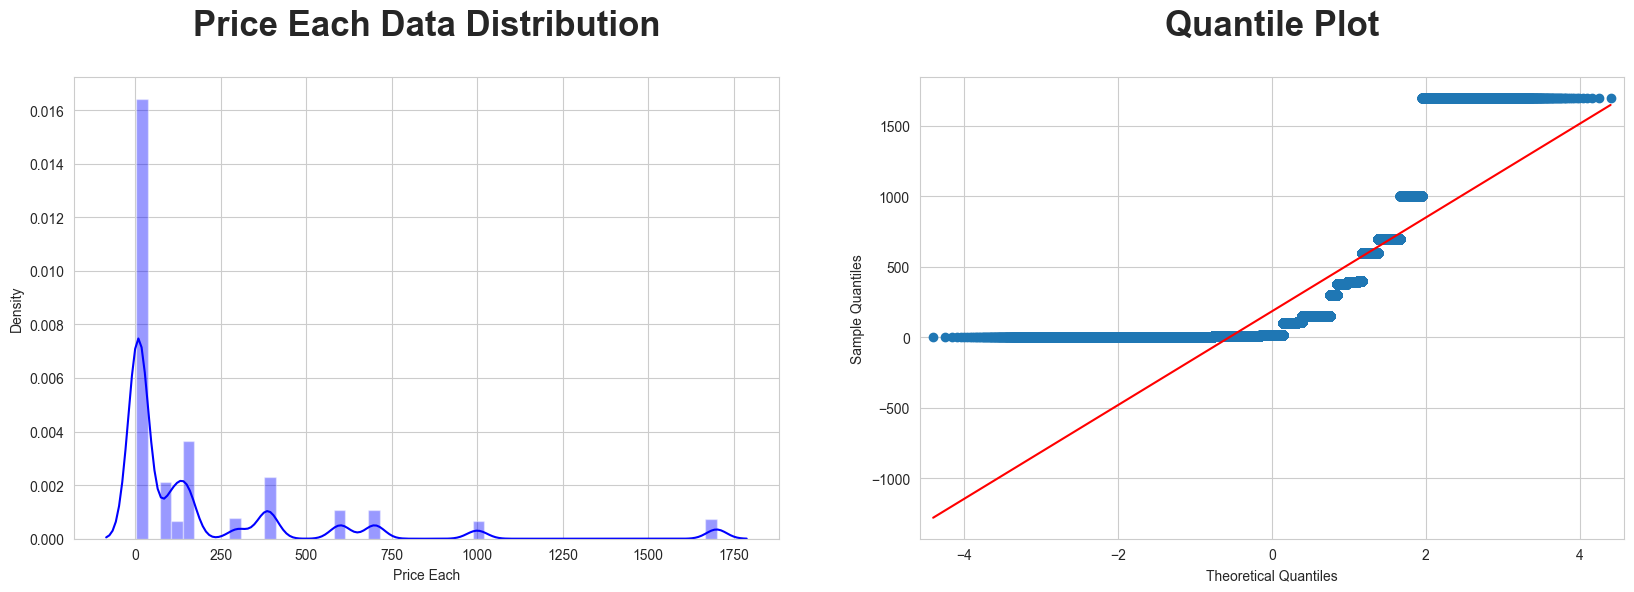

In [50]:
univariate_analysis(
    data=sales_data['Price Each'],
    color='Blue',
    title1='Price Each Data Distribution',
    title2='Quantile Plot'
);

C:\Users\kaikai\AppData\Local\Temp\ipykernel_11824\823558206.py:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(  # create a distplot visualization


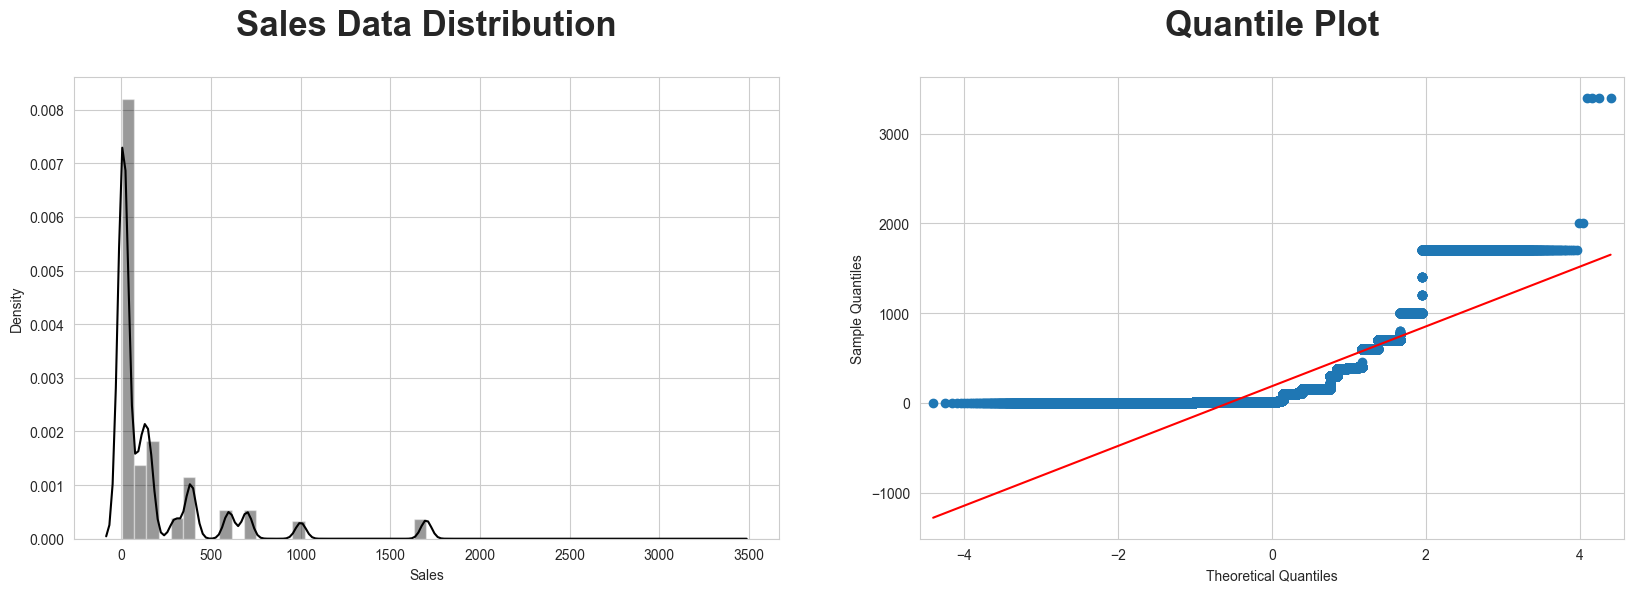

In [51]:
univariate_analysis(
    data=sales_data['Sales'],
    color='black',
    title1='Sales Data Distribution',
    title2='Quantile Plot'
);


In [52]:
# checking skewness value
# if value lies between -0.5 to 0.5  then it is normal otherwise skewed
skew_value = sales_data.skew().sort_values(ascending=False)
skew_value


C:\Users\kaikai\AppData\Local\Temp\ipykernel_11824\797231477.py:3: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skew_value = sales_data.skew().sort_values(ascending=False)


Year                73.933795
Quantity Ordered     4.833164
Sales                2.881913
Price Each           2.872149
Minute               0.002580
Order ID             0.000719
Month               -0.088588
Hour                -0.530377
dtype: float64

(array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
        175000., 200000.]),
 [Text(0, 0.0, '0'),
  Text(0, 25000.0, '25000'),
  Text(0, 50000.0, '50000'),
  Text(0, 75000.0, '75000'),
  Text(0, 100000.0, '100000'),
  Text(0, 125000.0, '125000'),
  Text(0, 150000.0, '150000'),
  Text(0, 175000.0, '175000'),
  Text(0, 200000.0, '200000')])

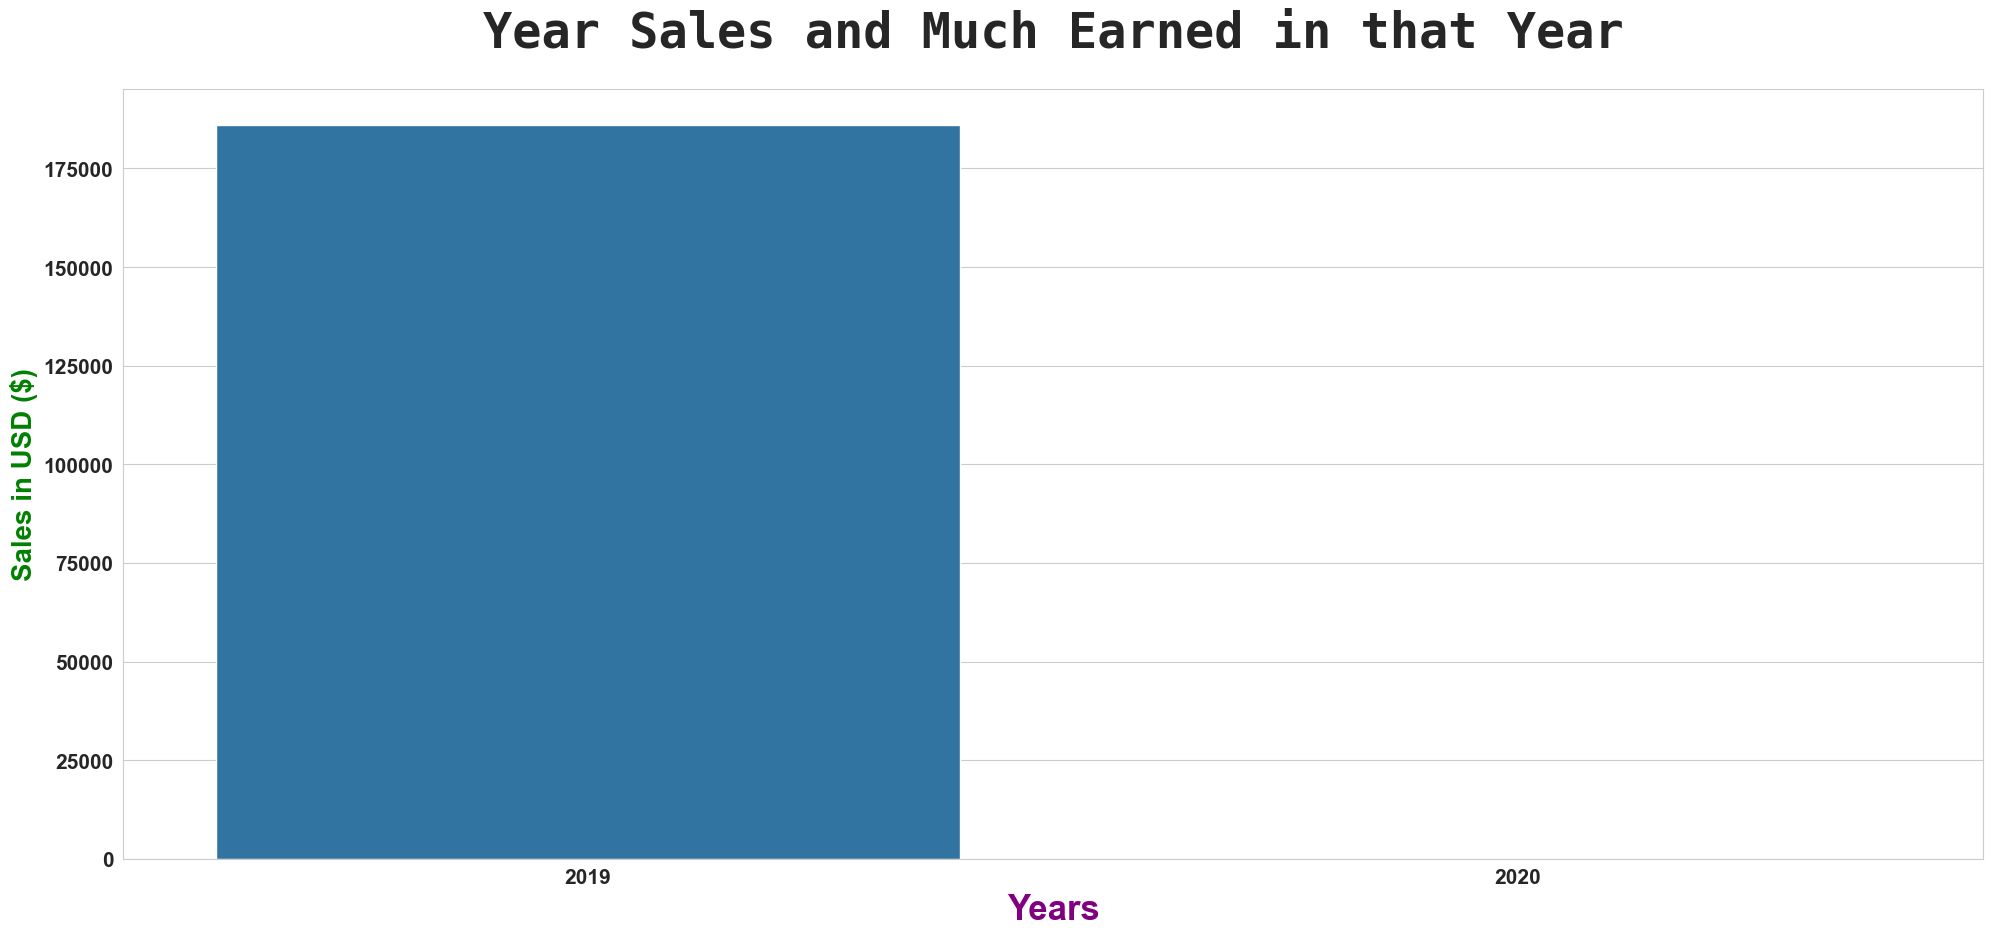

In [53]:
# let's plot it
plt.figure(figsize=(24, 10))  # figuring the size

# makes count plot
sns.countplot(
    x="Year",
    data=sales_data
)
plt.title(  # title
    "Year Sales and Much Earned in that Year",
    fontname="monospace",  # font-name
    weight="bold",  # weiqht
    fontsize=35,  # font-size
    pad=30  # padding
)
plt.xlabel(  # x-label
    "Years",
    weight="bold",  # weight
    color="purple",  # color
    fontsize=25,  # font-size
    loc="center"  # location
)
plt.xticks(  # x-ticks
    weight="bold",  # weight
    fontsize=15  # font-size
)
plt.ylabel(  # y-label
    "Sales in USD ($)",
    weight="bold",  # weight
    color="green",  # color
    fontsize=20  # font-size
)
plt.yticks(  # y-ticks
    weight="bold",  # weight
    fontsize=15  # font-size
)


C:\Users\kaikai\AppData\Local\Temp\ipykernel_11824\1230094244.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_of_month_and_earned = sales_data.groupby('Month').sum().astype('int')


(array([      0., 1000000., 2000000., 3000000., 4000000., 5000000.]),
 [Text(0, 0.0, '0'),
  Text(0, 1000000.0, '1'),
  Text(0, 2000000.0, '2'),
  Text(0, 3000000.0, '3'),
  Text(0, 4000000.0, '4'),
  Text(0, 5000000.0, '5')])

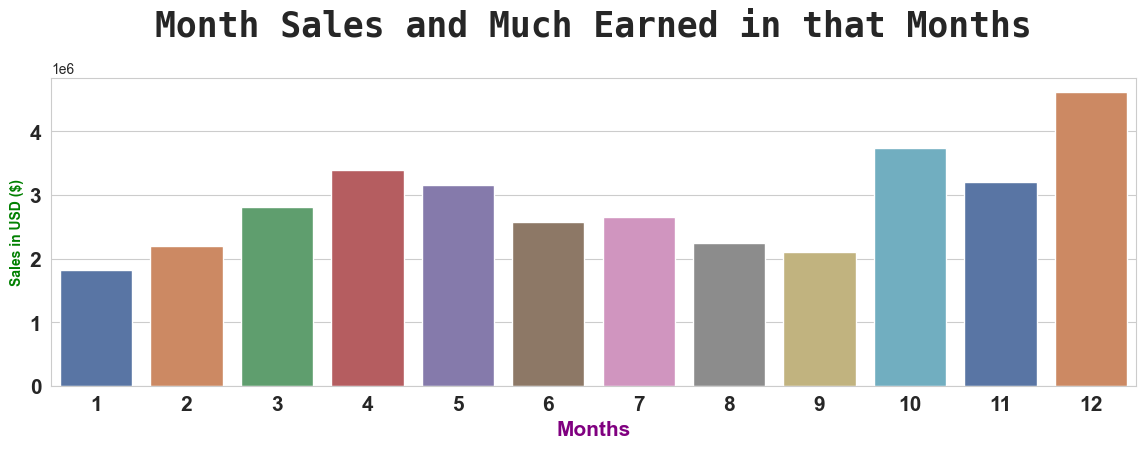

In [54]:
# group the Month cols
sum_of_month_and_earned = sales_data.groupby('Month').sum().astype('int')

# let's plot it
plt.figure(figsize=(14, 4))  # figuring the size

# makes bar plot
sns.barplot(  # barplot
    x=sum_of_month_and_earned.index,  # x-axis
    y=sum_of_month_and_earned["Sales"],  # y-axis
    data=sum_of_month_and_earned,  # data
    palette="deep"  # palette
)
plt.title(  # title
    "Month Sales and Much Earned in that Months",
    fontname="monospace",  # font-name
    weight="bold",  # weight
    fontsize=25,  # font-size
    pad=30  # padding
)
plt.xlabel(  # x-label
    "Months",
    weight="bold",  # weight
    color="purple",  # color
    fontsize=15,  # font-size
    loc="center"  # location
)
plt.xticks(  # x-ticks
    weight="bold",  # weight
    fontsize=15  # font-size
)
plt.ylabel(  # y-label
    "Sales in USD ($)",
    weight="bold",  # weight
    color="green",  # color
    fontsize=10  # font-size
)
plt.yticks(  # y-ticks
    weight="bold",  # weight
    fontsize=15  # font-size
)


C:\Users\kaikai\AppData\Local\Temp\ipykernel_11824\659214552.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  highest_number_of_sales = sales_data.groupby('Cities').sum().astype('int')


(array([      0., 1000000., 2000000., 3000000., 4000000., 5000000.,
        6000000., 7000000., 8000000., 9000000.]),
 [Text(0, 0.0, '0'),
  Text(0, 1000000.0, '1'),
  Text(0, 2000000.0, '2'),
  Text(0, 3000000.0, '3'),
  Text(0, 4000000.0, '4'),
  Text(0, 5000000.0, '5'),
  Text(0, 6000000.0, '6'),
  Text(0, 7000000.0, '7'),
  Text(0, 8000000.0, '8'),
  Text(0, 9000000.0, '9')])

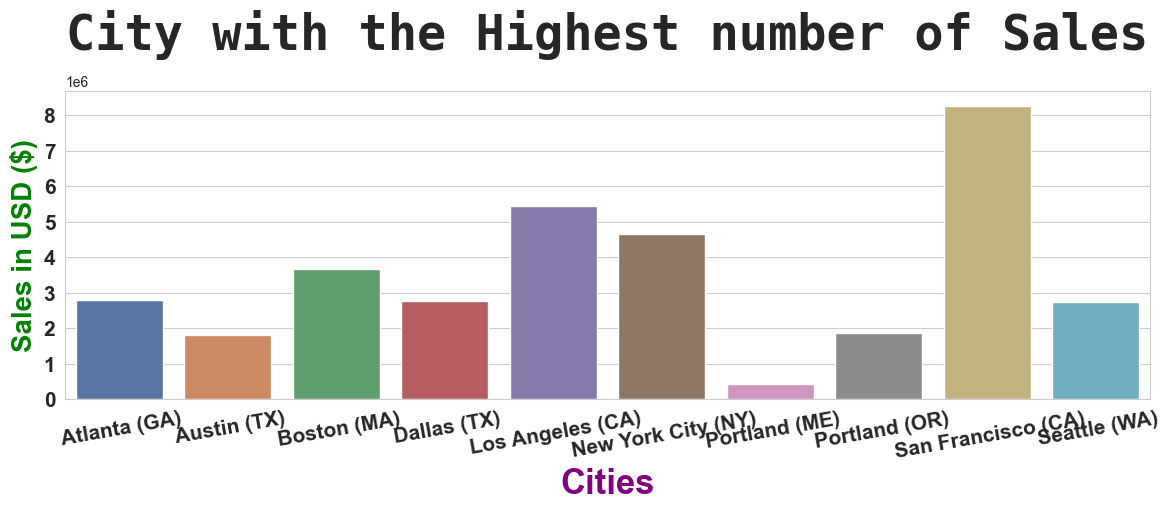

In [55]:
highest_number_of_sales = sales_data.groupby('Cities').sum().astype('int')

plt.figure(figsize=(14, 4))  # figuring the size

# makes bar plot
sns.barplot(  # barplot
    x=highest_number_of_sales.index,  # x-axis
    y=highest_number_of_sales["Sales"],  # y-axis
    data=highest_number_of_sales,  # data
    palette="deep"  # palette
)
plt.title(  # title
    "City with the Highest number of Sales",
    fontname="monospace",  # font-name
    weight="bold",  # weight
    fontsize=35,  # font-size
    pad=30  # padding
)
plt.xlabel(  # x-label
    "Cities",
    weight="bold",  # weight
    color="purple",  # color
    fontsize=25,  # font-size
    loc="center"  # location
)
plt.xticks(  # x-ticks
    weight="bold",  # weight
    fontsize=15,  # font-size
    rotation=10
)
plt.ylabel(  # y-label
    "Sales in USD ($)",
    weight="bold",  # weight
    color="green",  # color
    fontsize=20  # font-size
)
plt.yticks(  # y-ticks
    weight="bold",  # weight
    fontsize=15  # font-size
)


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 [Text(0, 0.0, '0'),
  Text(0, 2000.0, '2000'),
  Text(0, 4000.0, '4000'),
  Text(0, 6000.0, '6000'),
  Text(0, 8000.0, '8000'),
  Text(0, 10000.0, '10000'),
  Text(0, 12000.0, '12000'),
  Text(0, 14000.0, '14000')])

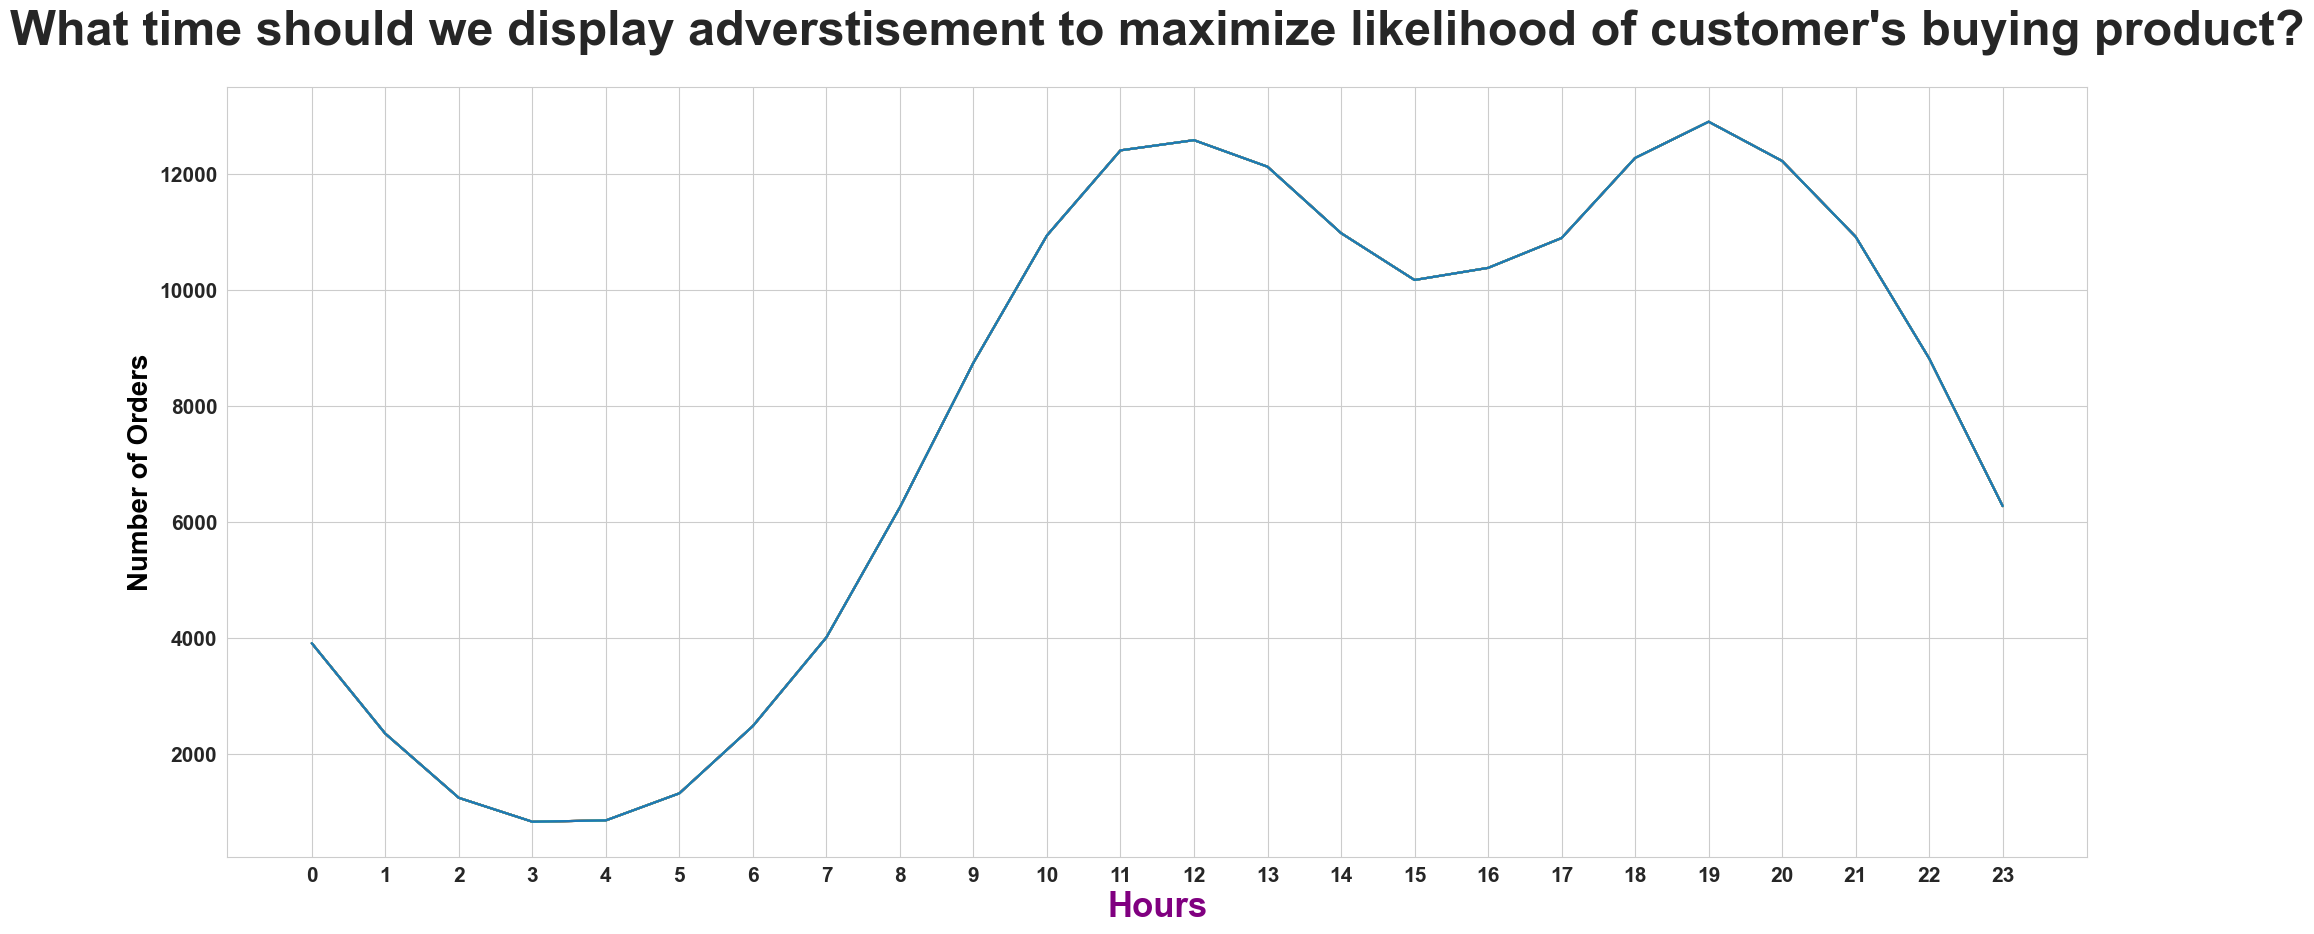

In [56]:
hours = [hour for hour, df in sales_data.groupby('Hour')]

plt.figure(figsize=(24, 10))  # figuring the size

# makes bar plot
plt.plot(  # plot
    hours,  # x-axis
    sales_data.groupby(['Hour']).count()  # data
)

# let's add grid
plt.grid(True)
plt.title(  # title
    "What time should we display adverstisement to maximize likelihood of customer's buying product?",
    weight="bold",  # weight
    fontsize=35,  # font-size
    pad=30
)
plt.xlabel(  # x-label
    "Hours",
    weight="bold",  # weight
    color="purple",  # color
    fontsize=25,  # font-size
    loc="center"  # location
)
plt.xticks(  # x-ticks
    ticks=hours,  # labels
    weight="bold",  # weight
    fontsize=15  # font-size
)
plt.ylabel(  # y-label
    "Number of Orders",
    weight="bold",  # weight
    color="black",  # color
    fontsize=20  # font-size
)
plt.yticks(  # y-ticks
    weight="bold",  # weight
    fontsize=15  # font-size
)


In [57]:
from itertools import combinations
from collections import Counter

# drop it using duplicated() funct
data = sales_data[sales_data['Order ID'].duplicated(keep=False)]

data['Grouped'] = sales_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

data = data[['Order ID', 'Grouped']].drop_duplicates()

count = Counter()
for row in data['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


C:\Users\kaikai\AppData\Local\Temp\ipykernel_11824\106294547.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Grouped'] = sales_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


C:\Users\kaikai\AppData\Local\Temp\ipykernel_11824\2559862684.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']
C:\Users\kaikai\AppData\Local\Temp\ipykernel_11824\2559862684.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = sales_data.groupby('Product').mean()['Price Each']
C:\Users\kaikai\AppData\Local\Temp\ipykernel_11824\2559862684.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(  # x-ticks


Text(0, 0.5, 'Price in USD ($)')

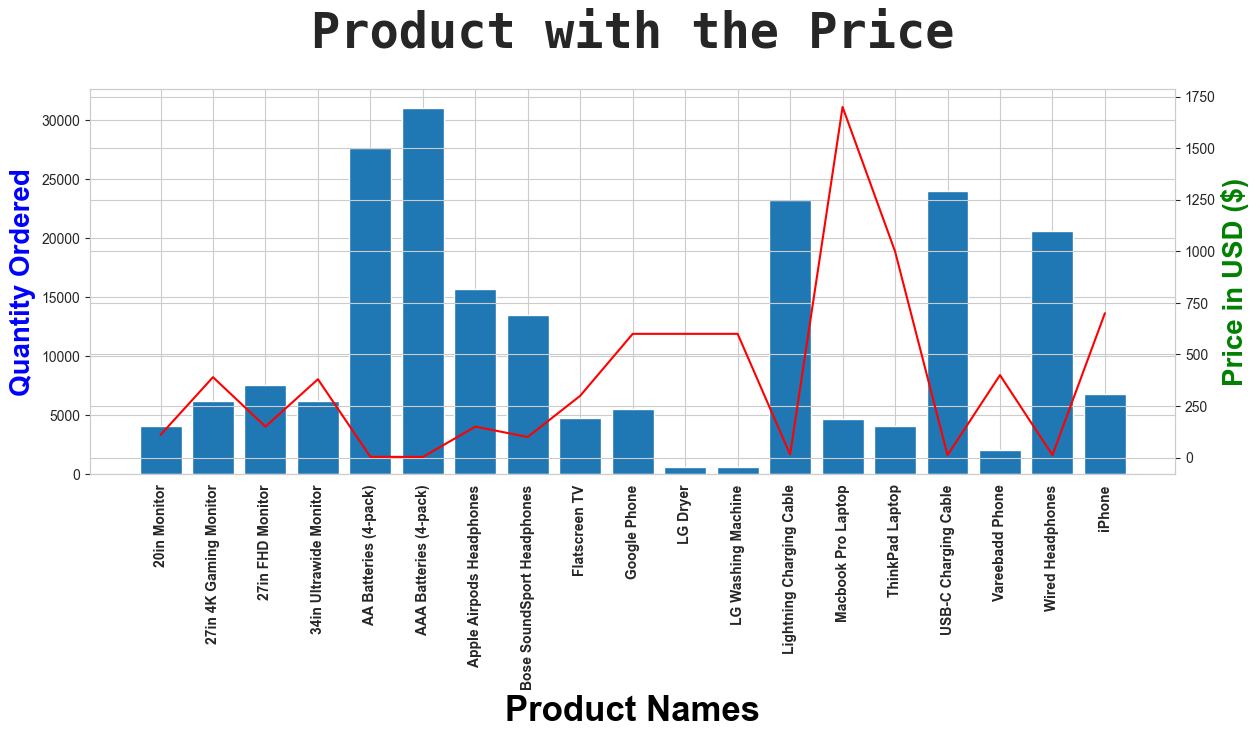

In [58]:
# prepare the varables for the plotting
# group the product
product_group = sales_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
prices = sales_data.groupby('Product').mean()['Price Each']
products = [product for product, df in product_group]
"""Visualization"""

fig, ax1 = plt.subplots(figsize=(14, 5))
ax2 = ax1.twinx()

ax1.bar(products, quantity_ordered)
ax1.set_title(  # title
    "Product with the Price",
    weight="bold",  # weight
    fontname="monospace",  # font-name
    fontsize=35,  # font-size
    pad=30  # padding
)
ax1.set_xlabel(  # x-label
    "Product Names",
    weight="bold",  # weight
    fontsize=25,  # font-size
    color="black"  # color
)
ax1.set_ylabel(  # y-label
    "Quantity Ordered",
    color="blue",  # color
    fontsize=20,  # font-size
    weight="bold"  # weight
)
ax1.set_xticklabels(  # x-ticks
    products,  # ticks
    rotation="vertical",  # rotation
    weight="bold"  # weight
)

# AXES 2
ax2.plot(  # plot
    products,  # x-axis
    prices,  # y-axis
    "r-"
)
ax2.set_ylabel(  # y-label
    "Price in USD ($)",
    color="green",  # color
    fontsize=20,  # font-size
    weight="bold"  # weight
)


In [59]:
sales_data.Product.value_counts().to_frame()

,Product
USB-C Charging Cable,21903
Lightning Charging Cable,21658
AAA Batteries (4-pack),20641
AA Batteries (4-pack),20577
Wired Headphones,18882
Apple Airpods Headphones,15549
Bose SoundSport Headphones,13325
27in FHD Monitor,7507
iPhone,6842
27in 4K Gaming Monitor,6230


In [60]:
def statistical_probability(frequency, total_frequency):
    return frequency / total_frequency


product = sales_data.Product.value_counts().sum()

In [61]:
usb_charging = sales_data[sales_data.Product == 'USB-C Charging Cable'].value_counts().sum()

# Calculating USB-C Charging Probability
P_USB = statistical_probability(usb_charging, product) * 100
Pprime_USB = 100 - P_USB
print('Probability for next people will order USB-C Charging Cable: %.2f%%' % P_USB)
print('Probability for next people will not order USB-C Charging Cable: %.2f%%' % Pprime_USB)


Probability for next people will order USB-C Charging Cable: 11.78%
Probability for next people will not order USB-C Charging Cable: 88.22%


In [62]:
iphone = sales_data[sales_data.Product == 'iPhone'].value_counts().sum()

Prob_ip = statistical_probability(iphone, product) * 100
Prob_not_ip = 100 - Prob_ip 

print('Probability for next people will order iPhone: %.2f%%' % Prob_ip)
print('Probability for next people will not order iPhone: %.2f%%' % Prob_not_ip)


Probability for next people will order iPhone: 3.68%
Probability for next people will not order iPhone: 96.32%


In [63]:
google = sales_data[sales_data.Product == 'Google Phone'].value_counts().sum()

Prob_google = statistical_probability(google, product) * 100
Prob_not_google = 100 - Prob_google

print('Probability for next people will order Google Phone: %.2f%%' % Prob_google)
print('Probability for next people will not order Google Phone: %.2f%%' % Prob_not_google)


Probability for next people will order Google Phone: 2.97%
Probability for next people will not order Google Phone: 97.03%
